In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from pyspark import SparkContext

In [3]:
R = pd.read_csv("/home/jorge/tfm-jvm/data/tables/base_recs.csv")
R

,pop,day,race,x,y,grid,id_v,id_p,start_day,id_s
0,400,2020-04-06,6,54,-91,393746,0,323350.0,01/04/2020,0
1,505,2020-04-07,6,54,-91,393746,0,323350.0,01/04/2020,0
2,554,2020-04-08,6,54,-91,393746,0,323350.0,01/04/2020,0
3,554,2020-04-09,6,54,-91,393746,0,323350.0,01/04/2020,0
4,631,2020-04-10,6,54,-91,393746,0,323350.0,01/04/2020,0
...,...,...,...,...,...,...,...,...,...,...
11045310,607,2020-04-16,3,-133,129,217339,1267685,116369.0,25/09/2019,189
11045311,609,2020-04-17,3,-133,129,217339,1267685,116369.0,25/09/2019,189
11045312,609,2020-04-18,3,-133,129,217339,1267685,116369.0,25/09/2019,189
11045313,617,2020-04-19,3,-133,129,217339,1267685,116369.0,25/09/2019,189


In [4]:
R.dtypes

pop            int64
day           object
race           int64
x              int64
y              int64
grid           int64
id_v           int64
id_p         float64
start_day     object
id_s           int64
dtype: object

In [5]:
R["id_p"] = R["id_p"].astype("int")
R["day"] = pd.to_datetime(R["day"], format="%Y-%m-%d")
R["start_day"] = pd.to_datetime(R["start_day"], format="%d/%m/%Y")

In [6]:
R["race"] = pd.cut(R["race"], [0, 1.2, 2.2, 3.2, 5.2, 6.2, 7.2], labels=["Romano", "Germano", "Galo", "Natare", "Egipcio", "Huno"])

In [7]:
R.isnull().sum()

pop          0
day          0
race         0
x            0
y            0
grid         0
id_v         0
id_p         0
start_day    0
id_s         0
dtype: int64

In [10]:
R

,pop,day,race,x,y,grid,id_v,id_p,start_day,id_s,rs_day
0,400,2020-04-06,Egipcio,54,-91,393746,0,323350,2020-04-01,0,5
1,505,2020-04-07,Egipcio,54,-91,393746,0,323350,2020-04-01,0,6
2,554,2020-04-08,Egipcio,54,-91,393746,0,323350,2020-04-01,0,7
3,554,2020-04-09,Egipcio,54,-91,393746,0,323350,2020-04-01,0,8
4,631,2020-04-10,Egipcio,54,-91,393746,0,323350,2020-04-01,0,9
...,...,...,...,...,...,...,...,...,...,...,...
11045310,607,2020-04-16,Galo,-133,129,217339,1267685,116369,2019-09-25,189,204
11045311,609,2020-04-17,Galo,-133,129,217339,1267685,116369,2019-09-25,189,205
11045312,609,2020-04-18,Galo,-133,129,217339,1267685,116369,2019-09-25,189,206
11045313,617,2020-04-19,Galo,-133,129,217339,1267685,116369,2019-09-25,189,207


### New Variables

#### Days

In [9]:
R["rs_day"] = (R["day"] - R["start_day"]).dt.days

In [24]:
temp.value_counts()

1.0     10072438
3.0           52
2.0           23
4.0           20
6.0           16
5.0           16
7.0           13
9.0            9
8.0            4
13.0           1
12.0           1
11.0           1
10.0           1
Name: rs_day, dtype: int64

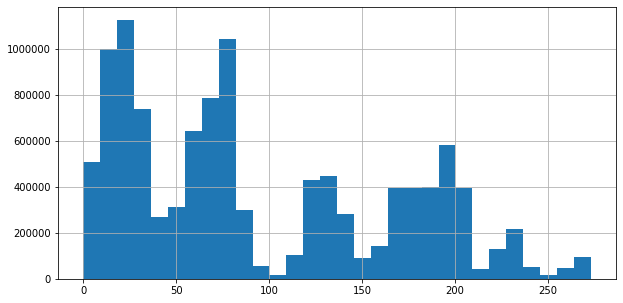

In [48]:
R["rs_day"].hist(bins=30, figsize=(10,5))

In [49]:
R["dayofweek"] = R["day"].dt.dayofweek

In [50]:
R["weekend"] = R["dayofweek"] >= 5

#### Growth

In [51]:
%%time
R["growth"] = R.groupby(by="id_v")["pop"].diff()

CPU times: user 2min 35s, sys: 2.52 s, total: 2min 38s
Wall time: 2min 35s


In [52]:
R.dropna(subset=["growth"], inplace=True)

#### Race

In [53]:
R = R.join(pd.get_dummies(R["race"]))
del R["race"]
R.head(20)

,pop,day,x,y,grid,id_v,id_p,start_day,id_s,rs_day,dayofweek,weekend,growth,Romano,Germano,Galo,Natare,Egipcio,Huno
1,505,2020-04-07,54,-91,393746,0,323350,2020-04-01,0,6,1,False,105.0,0,0,0,0,1,0
2,554,2020-04-08,54,-91,393746,0,323350,2020-04-01,0,7,2,False,49.0,0,0,0,0,1,0
3,554,2020-04-09,54,-91,393746,0,323350,2020-04-01,0,8,3,False,0.0,0,0,0,0,1,0
4,631,2020-04-10,54,-91,393746,0,323350,2020-04-01,0,9,4,False,77.0,0,0,0,0,1,0
5,661,2020-04-11,54,-91,393746,0,323350,2020-04-01,0,10,5,True,30.0,0,0,0,0,1,0
6,675,2020-04-12,54,-91,393746,0,323350,2020-04-01,0,11,6,True,14.0,0,0,0,0,1,0
7,705,2020-04-13,54,-91,393746,0,323350,2020-04-01,0,12,0,False,30.0,0,0,0,0,1,0
8,717,2020-04-14,54,-91,393746,0,323350,2020-04-01,0,13,1,False,12.0,0,0,0,0,1,0
9,720,2020-04-15,54,-91,393746,0,323350,2020-04-01,0,14,2,False,3.0,0,0,0,0,1,0
10,751,2020-04-16,54,-91,393746,0,323350,2020-04-01,0,15,3,False,31.0,0,0,0,0,1,0


### Add Village Atribute

In [54]:
V = pd.read_csv("/home/jorge/tfm-jvm/data/tables/V.csv")
R = R.merge(V[["id_v", "norm2"]], on="id_v")
del V

In [55]:
R.head()

,pop,day,x,y,grid,id_v,id_p,start_day,id_s,rs_day,dayofweek,weekend,growth,Romano,Germano,Galo,Natare,Egipcio,Huno,norm2
0,505,2020-04-07,54,-91,393746,0,323350,2020-04-01,0,6,1,False,105.0,0,0,0,0,1,0,105.815878
1,554,2020-04-08,54,-91,393746,0,323350,2020-04-01,0,7,2,False,49.0,0,0,0,0,1,0,105.815878
2,554,2020-04-09,54,-91,393746,0,323350,2020-04-01,0,8,3,False,0.0,0,0,0,0,1,0,105.815878
3,631,2020-04-10,54,-91,393746,0,323350,2020-04-01,0,9,4,False,77.0,0,0,0,0,1,0,105.815878
4,661,2020-04-11,54,-91,393746,0,323350,2020-04-01,0,10,5,True,30.0,0,0,0,0,1,0,105.815878


## Create Recs Players

In [65]:
%%time
pg = R.groupby(by=["id_p", "day", "start_day"])
print("hola")
temp = pg["pop"].count().reset_index()
print("adios")


rec_p = pd.DataFrame(temp["id_p"])
rec_p["day"] = temp["day"]
rec_p["start_day"] = temp["start_day"]
#rec_p["start_day"] = pg["start_day"].head(1).reset_index()["start_day"]
rec_p["N"] = pg["pop"].count().reset_index()["pop"]
rec_p["pop_sum"] = pg["pop"].sum().reset_index()["pop"]
rec_p["pop_mean"] = pg["pop"].mean().reset_index()["pop"]
rec_p["pop_std"] = pg["pop"].std().reset_index()["pop"]
rec_p["norm2_mean"] = pg["norm2"].mean().reset_index()["norm2"]
rec_p["norm2_std"] = pg["norm2"].std().reset_index()["norm2"]
    #Poner centroide
rec_p["g_sum"] = pg["growth"].sum().reset_index()["growth"]
rec_p["g_mean"] = pg["growth"].mean().reset_index()["growth"]
rec_p["g_std"] = pg["growth"].std().reset_index()["growth"]

rec_p["romanos"] = pg["Romano"].sum().reset_index()["Romano"]
rec_p["germano"] = pg["Germano"].sum().reset_index()["Germano"]
rec_p["galos"] = pg["Galo"].sum().reset_index()["Galo"]
rec_p["natares"] = pg["Natare"].sum().reset_index()["Natare"]
rec_p["egipcios"] = pg["Egipcio"].sum().reset_index()["Egipcio"]
rec_p["hunos"] = pg["Huno"].sum().reset_index()["Huno"]

rec_p["one_g"] = pg["growth"].any().reset_index()["growth"]

del pg


#del ser, cols

hola
adios
ana
CPU times: user 3.91 s, sys: 501 ms, total: 4.41 s
Wall time: 4.42 s


In [66]:
rec_p

,id_p,day,start_day,N,pop_sum,pop_mean,pop_std,norm2_mean,norm2_std,g_sum,g_mean,g_std,romanos,germano,galos,natares,egipcios,hunos,one_g
0,0,2020-04-07,2020-04-01,1,17,17.000000,NaN,152.121662,NaN,0.0,0.0,NaN,0,0,0,0.0,1,0,False
1,0,2020-04-08,2020-04-01,1,17,17.000000,NaN,152.121662,NaN,0.0,0.0,NaN,0,0,0,0.0,1,0,False
2,0,2020-04-09,2020-04-01,1,17,17.000000,NaN,152.121662,NaN,0.0,0.0,NaN,0,0,0,0.0,1,0,False
3,0,2020-04-10,2020-04-01,1,17,17.000000,NaN,152.121662,NaN,0.0,0.0,NaN,0,0,0,0.0,1,0,False
4,0,2020-04-11,2020-04-01,1,17,17.000000,NaN,152.121662,NaN,0.0,0.0,NaN,0,0,0,0.0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616551,325249,2020-04-12,2020-03-24,6,2786,464.333333,213.712580,132.720858,12.641545,0.0,0.0,0.000000,0,0,6,0.0,0,0,False
2616552,325249,2020-04-13,2020-03-24,6,2786,464.333333,213.712580,132.720858,12.641545,0.0,0.0,0.000000,0,0,6,0.0,0,0,False
2616553,325249,2020-04-14,2020-03-24,6,2786,464.333333,213.712580,132.720858,12.641545,0.0,0.0,0.000000,0,0,6,0.0,0,0,False
2616554,325249,2020-04-15,2020-03-24,5,2684,536.800000,240.178475,135.895819,11.142620,511.0,102.2,54.778645,0,0,5,0.0,0,0,True


In [59]:
rec_p.describe()

,id_p,N,pop_sum,pop_mean,pop_std,norm2_mean,norm2_std,g_sum,g_mean,g_std,romanos,germano,galos,natares,egipcios,hunos
count,2.616556e+06,2.616556e+06,2.616556e+06,2.616556e+06,1.583897e+06,2.616556e+06,1.583897e+06,2.616556e+06,2.616556e+06,1.583897e+06,2.616556e+06,2.616556e+06,2.616556e+06,2.616556e+06,2.616556e+06,2.616556e+06
mean,1.633701e+05,3.849562e+00,1.842095e+03,3.166973e+02,2.009413e+02,9.906729e+01,2.385621e+01,3.042688e+01,8.300444e+00,7.055412e+00,1.493684e+00,7.985837e-01,1.202646e+00,2.017377e-01,1.127031e-01,4.020782e-02
std,9.558090e+04,1.161097e+01,4.045512e+03,2.143035e+02,8.271533e+01,5.216818e+01,3.394569e+01,9.984816e+01,1.950937e+01,1.466530e+01,3.357113e+00,2.619350e+00,2.865235e+00,1.087247e+01,7.115757e-01,4.535772e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-5.636000e+03,-1.086000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.871300e+04,1.000000e+00,1.627500e+02,1.440000e+02,1.477853e+02,6.324101e+01,1.721567e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.642300e+05,2.000000e+00,5.470000e+02,2.916667e+02,2.015254e+02,9.120847e+01,9.625868e+00,0.000000e+00,0.000000e+00,2.121320e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.471198e+05,4.000000e+00,1.895000e+03,4.746667e+02,2.550148e+02,1.221843e+02,3.307568e+01,3.000000e+01,1.054545e+01,8.146102e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.252490e+05,1.694000e+03,5.830710e+05,1.770000e+03,8.725698e+02,5.656854e+02,3.777964e+02,3.756900e+04,7.600000e+02,6.378103e+02,4.400000e+01,4.500000e+01,5.300000e+01,1.694000e+03,4.000000e+01,3.000000e+01


In [60]:
rec_p.head()

,id_p,day,start_day,N,pop_sum,pop_mean,pop_std,norm2_mean,norm2_std,g_sum,g_mean,g_std,romanos,germano,galos,natares,egipcios,hunos,one_g
0,0,2020-04-07,2020-04-01,1,17,17.0,NaN,152.121662,NaN,0.0,0.0,NaN,0,0,0,0.0,1,0,False
1,0,2020-04-08,2020-04-01,1,17,17.0,NaN,152.121662,NaN,0.0,0.0,NaN,0,0,0,0.0,1,0,False
2,0,2020-04-09,2020-04-01,1,17,17.0,NaN,152.121662,NaN,0.0,0.0,NaN,0,0,0,0.0,1,0,False
3,0,2020-04-10,2020-04-01,1,17,17.0,NaN,152.121662,NaN,0.0,0.0,NaN,0,0,0,0.0,1,0,False
4,0,2020-04-11,2020-04-01,1,17,17.0,NaN,152.121662,NaN,0.0,0.0,NaN,0,0,0,0.0,1,0,False


In [69]:
rec_p[rec_p["id_p"] == 501]

,id_p,day,start_day,N,pop_sum,pop_mean,pop_std,norm2_mean,norm2_std,g_sum,g_mean,g_std,romanos,germano,galos,natares,egipcios,hunos,one_g,rs_day
4369,501,2020-04-07,2020-01-29,8,4111,513.875,262.883699,187.127913,1.93292,0.0,0.00,0.000000,8,0,0,0.0,0,0,False,69
4370,501,2020-04-08,2020-01-29,8,4111,513.875,262.883699,187.127913,1.93292,0.0,0.00,0.000000,8,0,0,0.0,0,0,False,70
4371,501,2020-04-09,2020-01-29,8,4111,513.875,262.883699,187.127913,1.93292,0.0,0.00,0.000000,8,0,0,0.0,0,0,False,71
4372,501,2020-04-10,2020-01-29,8,4457,557.125,234.658681,187.127913,1.93292,346.0,43.25,32.270066,8,0,0,0.0,0,0,True,72
4373,501,2020-04-11,2020-01-29,8,4457,557.125,234.658681,187.127913,1.93292,0.0,0.00,0.000000,8,0,0,0.0,0,0,False,73
4374,501,2020-04-12,2020-01-29,8,4457,557.125,234.658681,187.127913,1.93292,0.0,0.00,0.000000,8,0,0,0.0,0,0,False,74
4375,501,2020-04-13,2020-01-29,8,4457,557.125,234.658681,187.127913,1.93292,0.0,0.00,0.000000,8,0,0,0.0,0,0,False,75
4376,501,2020-04-14,2020-01-29,8,4457,557.125,234.658681,187.127913,1.93292,0.0,0.00,0.000000,8,0,0,0.0,0,0,False,76
4377,501,2020-04-15,2020-01-29,8,4457,557.125,234.658681,187.127913,1.93292,0.0,0.00,0.000000,8,0,0,0.0,0,0,False,77
4378,501,2020-04-16,2020-01-29,8,4457,557.125,234.658681,187.127913,1.93292,0.0,0.00,0.000000,8,0,0,0.0,0,0,False,78


### Add Variables

In [68]:
rec_p["rs_day"] = (rec_p["day"] - rec_p["start_day"]).dt.days

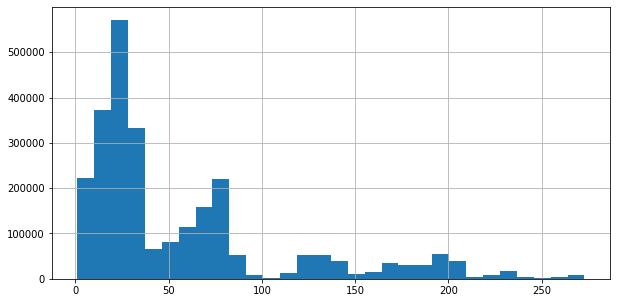

In [70]:
rec_p["rs_day"].hist(bins=30, figsize=(10,5))

In [71]:
rec_p["dayofweek"] = rec_p["day"].dt.dayofweek

In [72]:
rec_p["weekend"] = rec_p["dayofweek"] >= 5

In [73]:
del rec_p["day"], rec_p["start_day"]

In [74]:
rec_p.to_csv("/home/jorge/tfm-jvm/data/tables/rec_players.csv", index=False)

### Flag Inactives

In [30]:
%%time
rec_p = rec_p.sort_values(by=["id_p", "rs_day"])
temp = rec_p.groupby(by=["id_p"])["g_sum"].transform(lambda x: x.rolling(window=5, min_periods=1).sum())
rec_p["activity"] = temp.fillna(0) >= 10

CPU times: user 1min, sys: 222 ms, total: 1min
Wall time: 1min


In [89]:
rec_p[rec_p["id_p"] == 10]

,id_p,N,pop_sum,pop_mean,pop_std,norm2_mean,norm2_std,g_sum,g_mean,g_std,romanos,germano,galos,natares,egipcios,hunos,one_g,rs_day,dayofweek,weekend
61,10,15,10930,728.666667,214.172049,62.503328,32.185855,99.0,6.600000,8.244479,15,0,0,0.0,0,0,True,14,1,False
62,10,15,10978,731.866667,209.332567,62.503328,32.185855,48.0,3.200000,5.942582,15,0,0,0.0,0,0,True,196,2,False
63,10,16,11664,729.000000,199.448907,62.297588,31.105379,16.0,1.000000,22.387497,16,0,0,0.0,0,0,True,197,3,False
64,10,16,11749,734.312500,193.641496,62.297588,31.105379,85.0,5.312500,7.226975,16,0,0,0.0,0,0,True,198,4,False
65,10,16,11841,740.062500,188.956598,62.297588,31.105379,92.0,5.750000,6.434283,16,0,0,0.0,0,0,True,199,5,True
66,10,16,11917,744.812500,183.950435,62.297588,31.105379,76.0,4.750000,6.894442,16,0,0,0.0,0,0,True,200,6,True
67,10,16,11989,749.312500,179.922472,62.297588,31.105379,72.0,4.500000,5.621388,16,0,0,0.0,0,0,True,201,0,False
68,10,16,12049,753.062500,177.404047,62.297588,31.105379,60.0,3.750000,3.838402,16,0,0,0.0,0,0,True,202,1,False
69,10,16,12094,755.875000,171.251813,62.297588,31.105379,45.0,2.812500,8.068199,16,0,0,0.0,0,0,True,203,2,False
70,10,16,12206,762.875000,169.868135,62.297588,31.105379,112.0,7.000000,7.958224,16,0,0,0.0,0,0,True,204,3,False


In [17]:
R[R["id_p"] == 58]

,pop,day,race,x,y,grid,id_v,id_p,start_day,last_day,speed,id_country,territory,id_s,rs_day,dayofweek,weekend,growth,norm2
2472271,228,2020-04-07,Galo,45,-20,88466,291781,58.0,2020-03-25,2020-04-21,2,pl,False,188,13,1,False,15.0,49.244289
2472272,243,2020-04-08,Galo,45,-20,88466,291781,58.0,2020-03-25,2020-04-21,2,pl,False,188,14,2,False,15.0,49.244289
2472273,257,2020-04-09,Galo,45,-20,88466,291781,58.0,2020-03-25,2020-04-21,2,pl,False,188,15,3,False,14.0,49.244289
2472274,279,2020-04-10,Galo,45,-20,88466,291781,58.0,2020-03-25,2020-04-21,2,pl,False,188,16,4,False,22.0,49.244289
2472275,303,2020-04-11,Galo,45,-20,88466,291781,58.0,2020-03-25,2020-04-21,2,pl,False,188,17,5,True,24.0,49.244289
2472276,331,2020-04-12,Galo,45,-20,88466,291781,58.0,2020-03-25,2020-04-21,2,pl,False,188,18,6,True,28.0,49.244289
2472277,351,2020-04-13,Galo,45,-20,88466,291781,58.0,2020-03-25,2020-04-21,2,pl,False,188,19,0,False,20.0,49.244289
2472278,364,2020-04-14,Galo,45,-20,88466,291781,58.0,2020-03-25,2020-04-21,2,pl,False,188,20,1,False,13.0,49.244289
2472279,378,2020-04-15,Galo,45,-20,88466,291781,58.0,2020-03-25,2020-04-21,2,pl,False,188,21,2,False,14.0,49.244289
2472280,390,2020-04-16,Galo,45,-20,88466,291781,58.0,2020-03-25,2020-04-21,2,pl,False,188,22,3,False,12.0,49.244289


In [122]:
rec_p.corr()

,id_p,N,pop_sum,pop_mean,pop_std,g_sum,g_mean,g_std,speed,territory,rs_day,dayofweek,weekend,activity
id_p,1.000000,-0.010858,0.014621,0.076807,0.041549,-0.013629,-0.032521,-0.012727,0.059478,0.003711,-0.053142,0.002225,-0.002977,0.010625
N,-0.010858,1.000000,0.816951,0.135564,0.021493,0.261069,0.006043,0.011758,0.001008,0.001185,0.002014,-0.000625,-0.000332,0.074181
pop_sum,0.014621,0.816951,1.000000,0.398183,0.072458,0.271400,-0.001217,0.028542,0.006543,0.001972,-0.000042,-0.000451,-0.000567,0.140169
pop_mean,0.076807,0.135564,0.398183,1.000000,0.164642,0.113350,0.026171,0.048585,0.027861,0.005363,-0.008705,0.000058,-0.001176,0.232114
pop_std,0.041549,0.021493,0.072458,0.164642,1.000000,0.066424,0.024448,0.052147,0.015510,-0.002427,-0.009073,0.001401,0.001186,0.123541
g_sum,-0.013629,0.261069,0.271400,0.113350,0.066424,1.000000,0.654203,0.432658,-0.005645,-0.001352,0.009828,-0.000695,-0.000930,0.189583
g_mean,-0.032521,0.006043,-0.001217,0.026171,0.024448,0.654203,1.000000,0.457242,-0.013753,-0.003159,0.013295,-0.001087,-0.000570,0.225740
g_std,-0.012727,0.011758,0.028542,0.048585,0.052147,0.432658,0.457242,1.000000,-0.000174,-0.001388,0.001768,-0.000105,0.000324,0.124277
speed,0.059478,0.001008,0.006543,0.027861,0.015510,-0.005645,-0.013753,-0.000174,1.000000,-0.046186,-0.412435,0.012064,0.006859,-0.079550
territory,0.003711,0.001185,0.001972,0.005363,-0.002427,-0.001352,-0.003159,-0.001388,-0.046186,1.000000,-0.164929,0.050486,0.083667,-0.087434


In [124]:
pt = rec_p.groupby(by="id_p")["activity"].all()

In [127]:
pt.name = "no_inactive"

In [129]:
pt.to_csv("/home/jorge/tfm-jvm/data/tables/player_target.csv")

In [130]:
rec_p.to_csv("/home/jorge/tfm-jvm/data/tables/rec_players.csv", index=False)

In [68]:
%%time
R.to_csv("/home/jorge/tfm-jvm/data/tables/R.csv", index=False)

## Spark

In [2]:
rec_p = pd.read_csv("/home/jorge/tfm-jvm/data/tables/rec_players.csv")
rec_p

,id_p,day,N,pop_sum,pop_mean,pop_std,g_sum,g_mean,g_std,speed,territory,rs_day,dayofweek,weekend,activity
0,1.0,2020-04-16,1,52,52.000000,NaN,0.0,0.0,NaN,2,True,1,4,False,False
1,1.0,2020-04-17,1,52,52.000000,NaN,0.0,0.0,NaN,2,True,2,5,True,False
2,1.0,2020-04-14,1,52,52.000000,NaN,0.0,0.0,NaN,2,True,3,6,True,False
3,1.0,2020-04-18,1,52,52.000000,NaN,0.0,0.0,NaN,2,True,3,6,True,False
4,1.0,2020-04-15,1,52,52.000000,NaN,0.0,0.0,NaN,2,True,4,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797531,325249.0,2020-04-12,6,2786,464.333333,213.712580,0.0,0.0,0.000000,1,False,56,0,False,False
1797532,325249.0,2020-04-13,6,2786,464.333333,213.712580,0.0,0.0,0.000000,1,False,77,0,False,True
1797533,325249.0,2020-04-14,6,2786,464.333333,213.712580,0.0,0.0,0.000000,1,False,78,1,False,True
1797534,325249.0,2020-04-15,6,2890,481.666667,253.745279,511.0,102.2,54.778645,1,False,79,2,False,True


In [11]:
rec_p[rec_p["id_p"] == 100]

,id_p,day,N,pop_sum,pop_mean,pop_std,g_sum,g_mean,g_std,speed,territory,rs_day,dayofweek,weekend,activity
359,100.0,2020-04-09,1,380,380.0,NaN,0.0,NaN,NaN,1,False,91,2,False,False
360,100.0,2020-04-10,1,380,380.0,NaN,0.0,0.0,NaN,1,False,92,3,False,False
361,100.0,2020-04-11,1,380,380.0,NaN,0.0,0.0,NaN,1,False,93,4,False,False
362,100.0,2020-04-12,1,380,380.0,NaN,0.0,0.0,NaN,1,False,94,5,True,False
363,100.0,2020-04-13,1,380,380.0,NaN,0.0,0.0,NaN,1,False,95,6,True,False
364,100.0,2020-04-14,1,380,380.0,NaN,0.0,0.0,NaN,1,False,96,0,False,False
365,100.0,2020-04-15,1,380,380.0,NaN,0.0,0.0,NaN,1,False,97,1,False,False
366,100.0,2020-04-16,1,380,380.0,NaN,0.0,0.0,NaN,1,False,98,2,False,False


In [3]:
pt = pd.read_csv("/home/jorge/tfm-jvm/data/tables/player_target.csv")
pt

,id_p,no_inactive
0,1.0,False
1,4.0,False
2,10.0,False
3,11.0,False
4,12.0,False
...,...,...
164533,325240.0,False
164534,325242.0,False
164535,325243.0,False
164536,325245.0,False


In [6]:
pt["no_inactive"].value_counts()

False    164538
Name: no_inactive, dtype: int64

In [4]:
temp = rec_p.merge(pt, on="id_p")
temp

,id_p,day,N,pop_sum,pop_mean,pop_std,g_sum,g_mean,g_std,speed,territory,rs_day,dayofweek,weekend,activity,no_inactive
0,1.0,2020-04-16,1,52,52.000000,NaN,0.0,0.0,NaN,2,True,1,4,False,False,False
1,1.0,2020-04-17,1,52,52.000000,NaN,0.0,0.0,NaN,2,True,2,5,True,False,False
2,1.0,2020-04-14,1,52,52.000000,NaN,0.0,0.0,NaN,2,True,3,6,True,False,False
3,1.0,2020-04-18,1,52,52.000000,NaN,0.0,0.0,NaN,2,True,3,6,True,False,False
4,1.0,2020-04-15,1,52,52.000000,NaN,0.0,0.0,NaN,2,True,4,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797531,325249.0,2020-04-12,6,2786,464.333333,213.712580,0.0,0.0,0.000000,1,False,56,0,False,False,False
1797532,325249.0,2020-04-13,6,2786,464.333333,213.712580,0.0,0.0,0.000000,1,False,77,0,False,True,False
1797533,325249.0,2020-04-14,6,2786,464.333333,213.712580,0.0,0.0,0.000000,1,False,78,1,False,True,False
1797534,325249.0,2020-04-15,6,2890,481.666667,253.745279,511.0,102.2,54.778645,1,False,79,2,False,True,False
